Dado uma parede de largura 2L, simétrica em 0 com as bordas em x=-L e x=L, com 
constante de condutividade $K$ cercado por ar com $T_{1}$ a temperatura da camada limite
e $h_{1}$ a constante de convecção do ar, temos que a distribuição de temperatura é dada por

$$
T(x) = \frac{\dot{q} L^2}{2 K}\left(1 - \frac{x^2}{L^2}\right) + \frac{\dot{q} L}{h_1} + T_1
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Constantes escolhidas e justificadas
L = 1.0  # m
T_inf1 = 25.0  # °C 
K = 200.0  # W/m.K
h1 = 10.0  # W/m^2.K 
q_dot = 400.0  # W/m^3

In [4]:
x_values = np.linspace(-L, L, 200)

# Cálculo da temperatura T(x)
T_x_values = (
    (q_dot * L**2) / (2 * K) * (1 - (x_values**2 / L**2)) + (q_dot * L) / h1 + T_inf1
)

In [5]:
# Cálculo de temperaturas chave para verificação
T_surface = (q_dot * L) / h1 + T_inf1
T_center = (q_dot * L**2) / (2 * K) + T_surface

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_4125/333775225.py:3: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_values, T_x_values, label=f'$T(x)$ para $\dot{{q}} = {q_dot:.0f} \\mathrm{{W/m}}^3$')
/tmp/ipykernel_4125/333775225.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.scatter([-L, L], [T_surface, T_surface], color='green', zorder=5, label=f'$T_{{superfície}} = {T_surface:.2f}°C$ (x=$\pm$L)')
/tmp/ipykernel_4125/333775225.py:23: SyntaxWarning: invalid escape sequence '\d'
  f"$\dot{{q}} = {q_dot:.0f}$ W/m³\n"


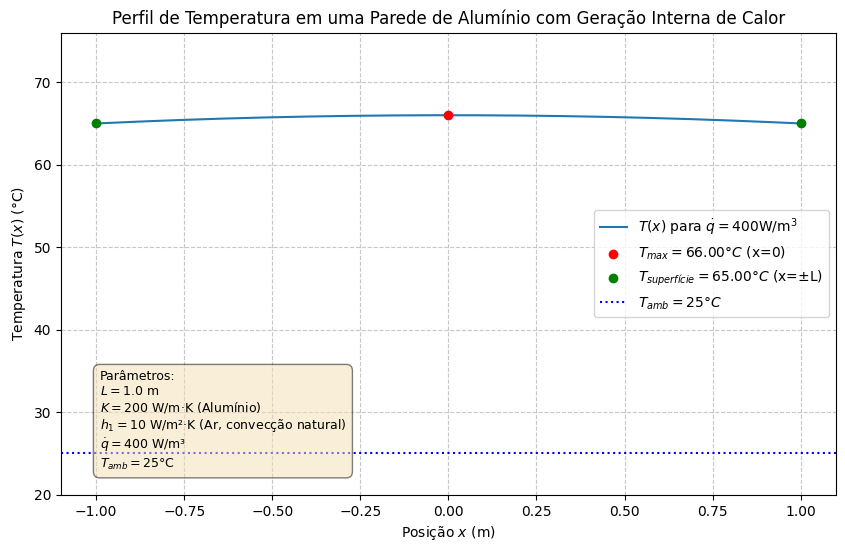

In [ ]:
# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(
    x_values,
    T_x_values,
    label=f"$T(x)$ para $\dot{{q}} = {q_dot:.0f} \\mathrm{{W/m}}^3$",
)
plt.scatter(
    [0],
    [T_center],
    color="red",
    zorder=5,
    label=f"$T_{{max}} = {T_center:.2f}°C$ (x=0)",
)
plt.scatter(
    [-L, L],
    [T_surface, T_surface],
    color="green",
    zorder=5,
    label=f"$T_{{superfície}} = {T_surface:.2f}°C$ (x=$\pm$L)",
)

# Configurações do gráfico
plt.title(
    "Perfil de Temperatura em uma Parede de Alumínio com Geração Interna de Calor"
)
plt.xlabel("Posição $x$ (m)")
plt.ylabel("Temperatura $T(x)$ (°C)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.axhline(T_inf1, color="blue", linestyle=":", label=f"$T_{{amb}} = {T_inf1:.0f}°C$")
plt.legend(loc="best")
plt.xlim(-L - 0.1, L + 0.1)  # Um pouco de margem
plt.ylim(T_inf1 - 5, T_center + 10)  # Ajustar limites de y para melhor visualização

# Adicionar texto com os parâmetros
param_text = (
    f"Parâmetros:\n"
    f"$L = {L:.1f}$ m\n"
    f"$K = {K:.0f}$ W/m·K (Alumínio)\n"
    f"$h_1 = {h1:.0f}$ W/m²·K (Ar, convecção natural)\n"
    f"$\dot{{q}} = {q_dot:.0f}$ W/m³\n"
    f"$T_{{amb}} = {T_inf1:.0f}$°C"
)
plt.text(
    0.05,
    0.05,
    param_text,
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment="bottom",
    bbox=dict(boxstyle="round,pad=0.5", fc="wheat", alpha=0.5),
)


plt.show()